## 문제 1
- 442명의 당뇨병 환자를 대상으로 한 검사 결과 데이터: 
    - https://data.hossam.kr/E04/diabetes.xlsx
- target = 당뇨병 진행률(종속변수)
- 주어진 데이터는 표준화가 적용되어 있다.
- 이를 활용하여 당뇨병 발병 가능성을 예측할 수 있는 회귀모델을 구현하고 분석 결과를 보고하라.

#### 필요한 패키지 참조 및 데이터 가져오기

In [60]:
from pca import pca
from pandas import read_excel, DataFrame, merge, melt
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

import sys, os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols, scalling

ImportError: cannot import name 'scalling' from 'helper' (/Users/dayoonz/Desktop/data_analysist/helper.py)

In [41]:
df = read_excel('https://data.hossam.kr/E04/diabetes.xlsx')
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


#### 데이터 전처리
- 독립 변수만 추출

In [43]:
x_train = df.drop(['target'], axis=1)
x_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


- 전체 요인에 대한 회귀분석

In [44]:
xnames = list(df.columns)
xnames.remove('target')
model1 = my_ols(df, y='target', x = xnames)
model1

- 요약 결과

In [45]:
model1.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                        18:05:36   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 결과표 확인

In [46]:
model1.table

B     표준오차  β        t   유의확률        VIF
종속변수   독립변수                                                  
target age    -10.0099   59.749  0  -0.168*  0.867   1.217315
       sex   -239.8156   61.222  0  -3.917*  0.000   1.283075
       bmi    519.8459   66.533  0   7.813*  0.000   1.532949
       bp     324.3846   65.422  0   4.958*  0.000   1.468583
       s1    -792.1756  416.680  0  -1.901*  0.058  59.257108
       s2     476.7390  339.030  0   1.406*  0.160  39.213144
       s3     101.0433  212.531  0   0.475*  0.635  15.403044
       s4     177.0632  161.476  0   1.097*  0.273   8.893714
       s5     751.2737  171.900  0   4.370*  0.000  10.125073
       s6      67.6267   65.984  0   1.025*  0.306   1.485021

- 예측값 생성

In [47]:
y1 = model1.fit.predict(x_train)
y1

0      206.116677
1       68.071033
2      176.882790
3      166.914458
4      128.462258
          ...    
437    193.017565
438    101.055814
439    121.226681
440    211.858945
441     53.447275
Length: 442, dtype: float64

- 표준화 되어있으므로 표준화 과정 생략

- 차원 축소 적용 (주성분 분석 객체 생성 및 결과 확인)
    - pca 분석

In [48]:
pca_model = pca(n_components = len(x_train.columns))
fit = pca_model.fit_transform(x_train)
print(fit['topfeat'])

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
      PC feature   loading  type
0    PC1      s4  0.428834  best
1    PC2      s1  0.573027  best
2    PC3      bp  0.513571  best
3    PC4     sex -0.679860  best
4    PC5     age -0.686876  best
5    PC6      s6  0.805066  best
6    PC7      s5  0.647302  best
7    PC8      bp -0.477360  best
8    PC9      s4  0.773817  best
9   PC10      s1  0.709775  best
10   PC7     bmi -0.519874  weak
11  PC10      s2 -0.563195  weak
12   PC2      s3  0.506239  weak


- 차원 축소 적용 (주성분 분석 객체 생성 및 결과 확인)
    - 1) 시각화를 통한 기여도 확인

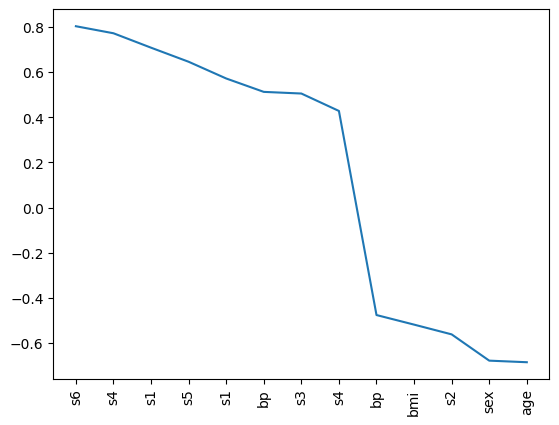

뚝 떨어지기 직전까지가 영향을 많이 주는 요소


In [49]:
pca_df = fit['topfeat']
pca_df.sort_values('loading', ascending = False, inplace = True)
pca_df.set_index('feature', inplace = True)
pca_df['loading']

xlabel = pca_df['loading'].index
y = pca_df['loading'].values
x = list(range(len(y)))
sb.lineplot(x=x, y=y)
plt.xticks(x, xlabel, rotation=90)
plt.show()
plt.close()

print("뚝 떨어지기 직전까지가 영향을 많이 주는 요소")

- 차원 축소 적용 (주성분 분석 객체 생성 및 결과 확인)
    - 2. 선정된 요인을 사용하여 회귀분석 수행

In [50]:
model2 = my_ols(df, y='target', x=['s6','s4','s1','s5','bp','s3'])

- 차원 축소 적용 (주성분 분석 객체 생성 및 결과 확인)
    - 3. 요약 결과

In [51]:
model2.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     51.55
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           7.70e-48
Time:                        18:06:30   Log-Likelihood:                -2428.5
No. Observations:                 442   AIC:                             4871.
Df Residuals:                     435   BIC:                             4900.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.823     53.899      0.000     146.586     157.681
s6           126.4813     70.640      1.790      0.074     -12.357     265.320
s4            35.9208    174.587      0.206      0.837    -307.218     379.060
s1          -138.8137    123.913     -1.120      0.263    -382.357     104.729
s5           658.9295     84.467      7.801      0.000     492.915     824.944
bp           387.7776     67.065      5.782      0.000     255.965     519.590
s3          -238.8947    149.211     -1.601      0.110    -532.159      54.369
==============================================================================
Omnibus:                        5.904   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.522
Skew:                           0.222   Prob(JB):                       0.0632
Kurtosis:                       2.680   Cond. No.                         87.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 차원 축소 적용 (주성분 분석 객체 생성 및 결과 확인)
    - 4. 결과표 확인

In [52]:
y2 = model2.fit.predict(x_train)
y2

0      187.914775
1       67.214133
2      162.506693
3      159.833966
4      131.053881
          ...    
437    204.313806
438    120.827759
439    140.662926
440    184.205295
441     63.602616
Length: 442, dtype: float64

- 두 가지 모델의 결과 비교

In [53]:
rdf = DataFrame({
    's6': df['s6'],
    'y': df['target'],
    'y1': y1,
    'y2': y2
})

rdf

,s6,y,y1,y2
0,-0.017646,151,206.116677,187.914775
1,-0.092204,75,68.071033,67.214133
2,-0.025930,141,176.882790,162.506693
3,-0.009362,206,166.914458,159.833966
4,-0.046641,135,128.462258,131.053881
...,...,...,...,...
437,0.007207,178,193.017565,204.313806
438,0.044485,104,101.055814,120.827759
439,0.015491,132,121.226681,140.662926
440,-0.025930,220,211.858945,184.205295


In [59]:
mdf1 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y1'])
print(mdf1)
mdf2 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y2'])
print(mdf2)

           s6 variable       value
0   -0.017646        y  151.000000
1   -0.092204        y   75.000000
2   -0.025930        y  141.000000
3   -0.009362        y  206.000000
4   -0.046641        y  135.000000
..        ...      ...         ...
879  0.007207       y1  193.017565
880  0.044485       y1  101.055814
881  0.015491       y1  121.226681
882 -0.025930       y1  211.858945
883  0.003064       y1   53.447275

[884 rows x 3 columns]
           s6 variable       value
0   -0.017646        y  151.000000
1   -0.092204        y   75.000000
2   -0.025930        y  141.000000
3   -0.009362        y  206.000000
4   -0.046641        y  135.000000
..        ...      ...         ...
879  0.007207       y2  204.313806
880  0.044485       y2  120.827759
881  0.015491       y2  140.662926
882 -0.025930       y2  184.205295
883  0.003064       y2   63.602616

[884 rows x 3 columns]


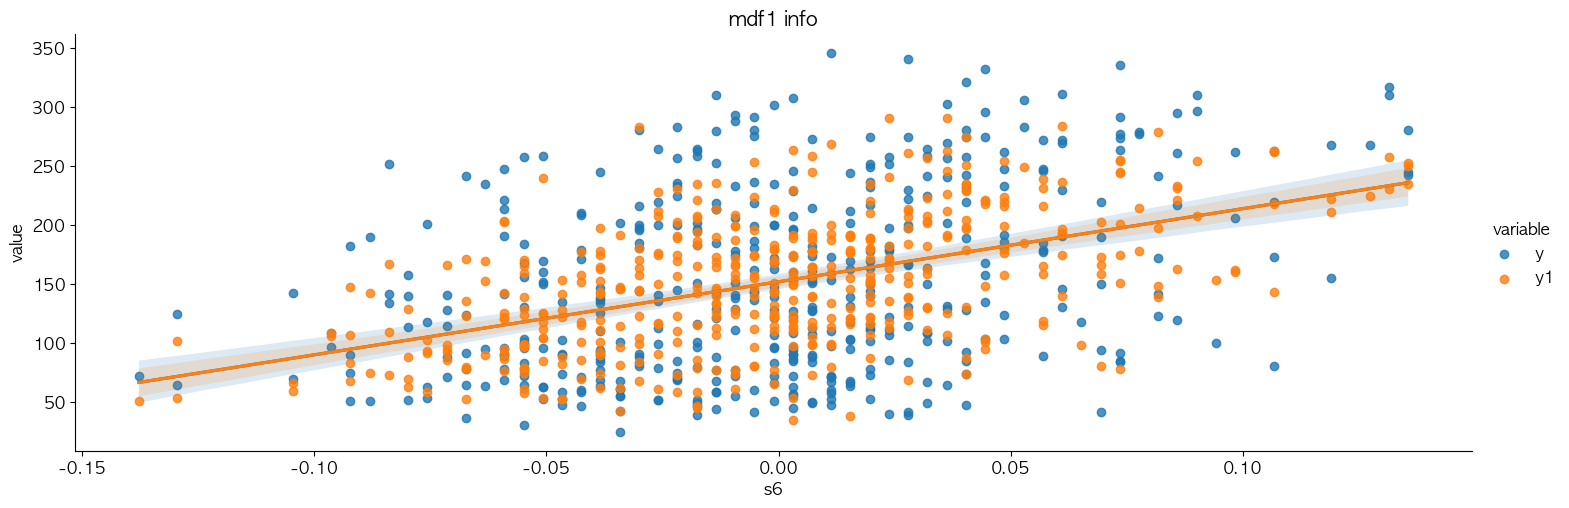

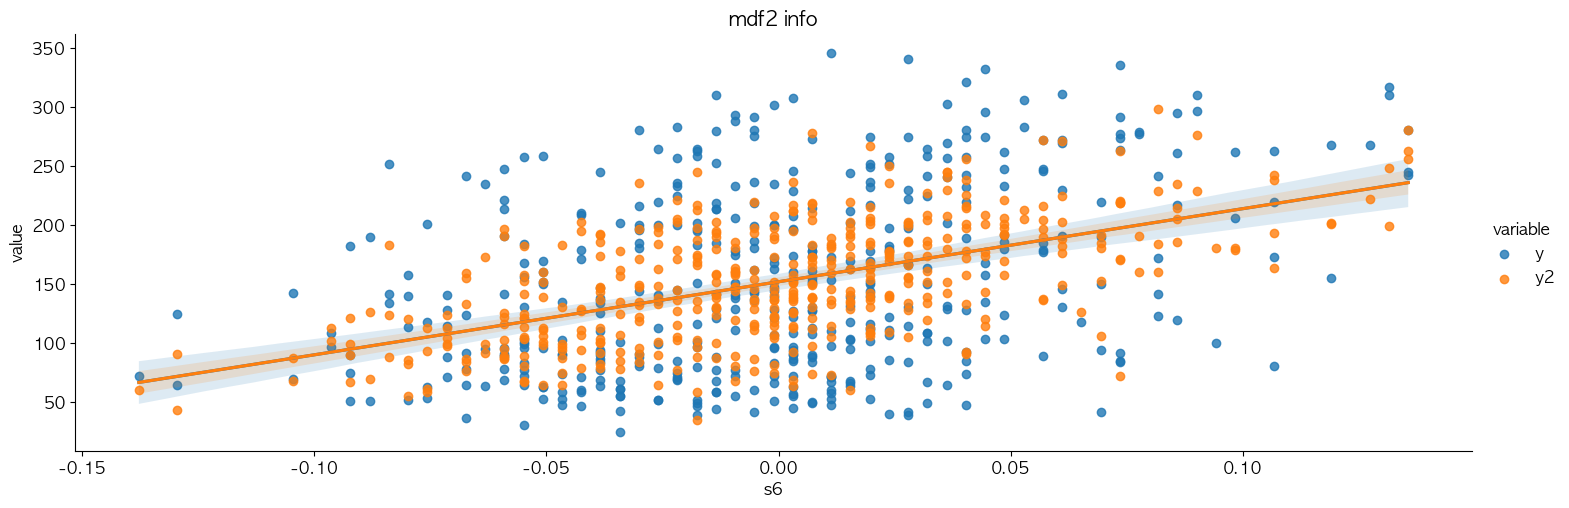

In [58]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
# plt.rcParams["figure.figsize"] = (10, 5) # lmplot()은 이 파라미터가 안 먹힘
plt.rcParams["axes.unicode_minus"] = False

sb.lmplot(data=mdf1, x="s6", y="value", hue="variable", height=5, aspect=3)
plt.title('mdf1 info')
plt.show()
plt.close()

sb.lmplot(data=mdf2, x="s6", y="value", hue="variable", height=5, aspect=3)
plt.title('mdf2 info')
plt.show()
plt.close()

## 문제 2
- 다음의 데이터는 뉴욕 멘하튼의 주택임대료에 영향을 준다고 예상되는 변수들과 주택 임대료를 정리한 것이다.
> https://data.hossam.kr/E04/manhattan.xlsx
- 다양한 변수 중에서 목표로 하는 종속변수는 `rent`이다. 분석하라


In [25]:
from sklearn.decomposition import PCA
from pca import pca
# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler

from pandas import read_excel, DataFrame

from matplotlib import pyplot as plt
import seaborn as sb

import sys, os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols

In [26]:
# 데이터 가져오기
df = read_excel('https://data.hossam.kr/E04/manhattan.xlsx')
df

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


#### 데이터 전처리
- 종속변수 및 독립변수 분리

In [31]:
x_train = df.drop('rent', axis = 1)
x_train

y_train = DataFrame(df['rent'])
y_train

,rent
0,2550
1,11500
2,4500
3,4795
4,17500
...,...
3534,4210
3535,6675
3536,1699
3537,3475


- 모든 borough가 Manhattan이므로 borough 컬럼 제거

In [151]:
x_train['borough'].value_counts()

borough
Manhattan    3539
Name: count, dtype: int64

In [152]:
x_train1 = x_train.drop('borough', axis =1)
x_train1

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea
3535,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca
3536,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy
3537,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West


- neighborhood컬럼의 string값을 int값으로 변환

In [153]:
neighborhood_len = len(x_train1['neighborhood'].value_counts())

neighborhood_list = []
for a in x_train1['neighborhood']:
    if a not in neighborhood_list:
        neighborhood_list.append(a)
    else:
        continue

neighborhood_dict = {}
n = 1
for a in range(len(neighborhood_list)):
    if neighborhood_list[a] not in neighborhood_dict:
        neighborhood_dict[neighborhood_list[a]] = n
        n += 1
    else:
        continue

x_train1['neighborhood'] = x_train1['neighborhood'].map(neighborhood_dict)
x_train1

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,2
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,3
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,2
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,18
3535,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,13
3536,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,28
3537,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,10


#### 표준화 및 표준화 결과를 데이트프레임으로 재구성

In [155]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train1)
x_train_std

std_df = DataFrame(x_train_std, columns = x_train1.columns)
std_df

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood
0,-1.397410,-0.611790,-0.962011,0.730862,-0.904097,-0.888763,1.21585,2.336243,-0.436784,-0.625393,1.546964,2.094423,-0.241482,2.171931,-1.402736
1,0.669863,1.056257,2.218694,-0.176116,-0.995343,1.117593,-0.82247,-0.428038,-0.436784,-0.625393,-0.646428,-0.477459,-0.241482,-0.460420,-1.244451
2,-0.363774,-0.611790,-0.049651,-0.538908,3.566974,-0.584000,-0.82247,2.336243,-0.436784,1.598995,1.546964,2.094423,-0.241482,-0.460420,-1.086166
3,-0.363774,-0.611790,0.073811,-0.357512,-0.356619,-0.533206,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931,-1.244451
4,0.669863,1.056257,8.077886,-0.357512,-0.721604,2.133470,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931,-0.927882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,-0.363774,-0.611790,-0.853197,-0.357512,-0.356619,-0.914160,1.21585,2.336243,2.289459,1.598995,1.546964,2.094423,-0.241482,2.171931,1.288103
3535,0.669863,1.056257,0.101014,0.005279,-0.174126,-1.091938,1.21585,2.336243,2.289459,1.598995,1.546964,2.094423,-0.241482,2.171931,0.496680
3536,-1.397410,-0.611790,-1.443302,-0.538908,-0.630358,1.117593,-0.82247,-0.428038,-0.436784,-0.625393,-0.646428,-0.477459,-0.241482,-0.460420,2.870950
3537,-0.363774,-0.611790,-0.604182,0.186675,-0.630358,-0.964953,1.21585,-0.428038,2.289459,1.598995,1.546964,2.094423,-0.241482,2.171931,0.021826


#### 주성분 분석 객체 생성 및 결과 확인

In [157]:
model = PCA(n_components = 5)
fit = model.fit_transform(std_df)
fit

pca_df = DataFrame(fit)
pca_df

,0,1,2,3,4
0,2.480844,-2.082322,1.173025,1.170057,-0.396256
1,-0.864166,2.440321,-1.592509,1.225905,-0.071507
2,2.993170,-0.557126,1.760546,-0.300406,-0.762154
3,2.795652,-0.845060,-0.174325,1.011444,-0.642385
4,3.562423,5.062023,-2.860385,0.512110,-0.647318
...,...,...,...,...,...
3534,4.237175,-2.023659,0.422612,-1.542005,0.128743
3535,4.611761,0.148730,0.734027,-1.088735,0.092595
3536,-1.732157,-2.067023,-1.774788,-1.577294,-0.079210
3537,3.271115,-1.556346,0.751589,-0.085446,0.559285


#### pca 패키지 사용한 분석 

In [161]:
model = pca(n_components=len(std_df.columns))
fit = model.fit_transform(std_df)
fit
topfit = fit['topfeat']
topfit

best = topfit.query("type == 'best'")
feature = list(set(list(best['feature'])))
feature

ols = my_ols(df, "rent", feature)
ols.summary

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[15]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''